#### Checking some functions of librosa for data analysis

In [390]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='train/bollywood_STK 1982 - Kitne Bhi Tu(Female).wav'
librosa_audio_data, librosa_sample_rate=librosa.load(audio_file_path,sr = 44100)
librosa_sample_rate

44100

In [396]:
librosa_audio_data

0.0


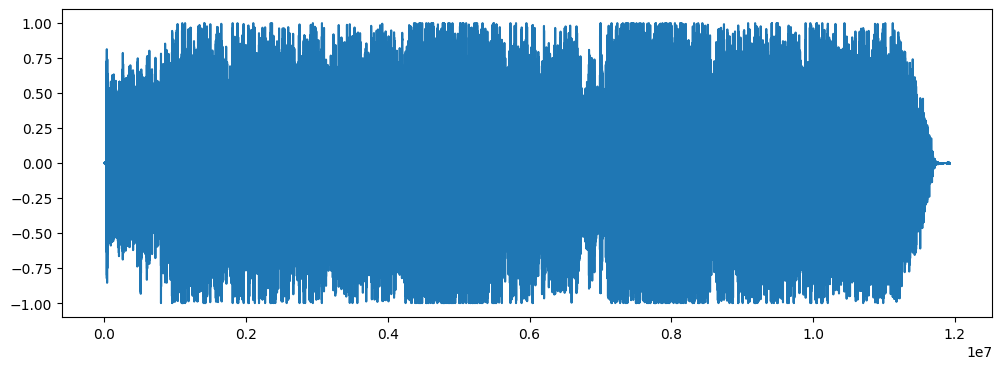

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [4]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=20)
print(mfccs.shape)

(20, 23304)


In [5]:
mfccs

array([[-505.37363, -505.37363, -505.37363, ..., -505.37363, -505.37363,
        -505.37363],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

### Model Preparation and Data Analysis

In [22]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='train/'
metadata=pd.read_csv('train/Merged csv - song_files_with_class_exact.csv')
# metadata

In [23]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name,sr = 44100) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)
    # print(mfccs_features)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [24]:
import numpy as np
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in (metadata.iterrows()):
    file_name = os.path.join('train/',str(row["slice_file_name"]))
    # print(file_name)
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

In [25]:
# file_name = os.path.join('train/Baj Gayi Ghanti.wav')
# audio, sample_rate = librosa.load(file_name,sr = 44100) 

In [26]:
# extracted_features=[]
# filename = 'train/old_MJS-Aao Kanhai Mere Dham.wav'
# data=features_extractor(filename)
# data
# # extracted_features.append([data,final_class_labels])
# # extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
# # extracted_features_df.tail()

# extracted_features=[]
metadata=pd.read_csv('anthem/anthem-data.csv')
for index_num,row in (metadata.iterrows()):
    file_name = os.path.join('anthem/',str(row["slice_file_name"]))
    # print(file_name)
    final_class_labels=row["class"]
    # data=features_extractor(file_name)
    mfcc_features = pd.read_csv(file_name)
    # mfcc_features = mfcc_features.drop(index=0).reset_index(drop=True)
    num_frames, num_coeffs = mfcc_features.shape
    # Convert the DataFrame to a NumPy array
    mfcc_array = mfcc_features.values
    # Reshape the array to its original dimensions
    mfcc_matrix = mfcc_array.reshape(num_frames, num_coeffs)
    # print(mfcc_matrix)
    mfccs_scaled_features = np.mean(mfcc_matrix.T,axis=0)
    extracted_features.append([mfccs_scaled_features,final_class_labels])

In [27]:
# mfcc_features

In [28]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.tail()

,feature,class
69,"[-256.01001272733987, 139.39327876617466, -7.1...",anthem
70,"[-226.047499140475, 153.0845083156622, -5.7326...",anthem
71,"[-138.5192946992875, 168.25097320949138, -66.3...",anthem
72,"[-234.53966056481298, 126.21139462388994, -17....",anthem
73,"[-355.473327295414, 174.76897189419591, -14.28...",anthem


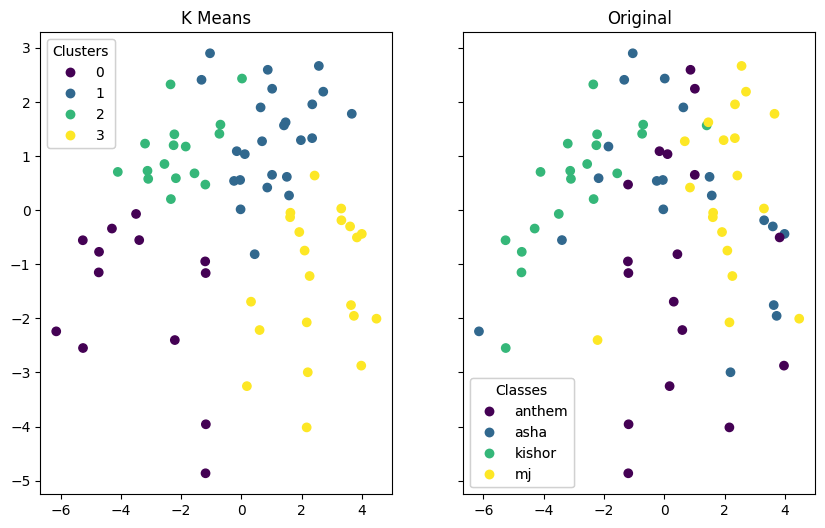

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert the 'feature' column to a list of lists
feature_list = extracted_features_df['feature'].tolist()

# Determining the number of elements in each feature list
num_features = len(feature_list[0])
column_names = [f"feature_{i}" for i in range(num_features)]

# Create a new DataFrame with the split features
new_df = pd.DataFrame(feature_list, columns=column_names)

# Concatenate the new DataFrame with the 'class' column
final_df = pd.concat([new_df, extracted_features_df['class']], axis=1)

# Prepare data
X = final_df.drop(['class'], axis=1)
Y = final_df['class']

# Standardize features
scale = StandardScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)

# Encode labels
encoder = LabelEncoder()
Y_enc = encoder.fit_transform(Y)
from sklearn.decomposition import PCA

pca = PCA(n_components=3,whiten=False);
pca.fit(X_scaled)
xPCA = pca.transform(X_scaled)
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(xPCA)

# Plot with legends
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
ax1.set_title('K Means')
scatter1 = ax1.scatter(xPCA[:, 0], xPCA[:, 1], c=kmeans.labels_, cmap='viridis')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Clusters")
ax1.add_artist(legend1)

ax2.set_title("Original")
scatter2 = ax2.scatter(xPCA[:, 0], xPCA[:, 1], c=Y_enc, cmap='viridis')
# Map class names to encoded values for legend labels
legend_labels = {i: label for i, label in enumerate(encoder.classes_)}
legend2 = ax2.legend(handles=scatter2.legend_elements()[0], labels=[legend_labels[i] for i in range(len(legend_labels))], title="Classes")
ax2.add_artist(legend2)

plt.show()


In [30]:
Y_enc

array([2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

#### Training Dataset for main model

In [31]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
y

array(['kishor', 'asha', 'asha', 'kishor', 'kishor', 'kishor', 'asha',
       'kishor', 'asha', 'asha', 'asha', 'kishor', 'kishor', 'asha',
       'kishor', 'asha', 'kishor', 'asha', 'asha', 'kishor', 'mj', 'mj',
       'mj', 'mj', 'mj', 'mj', 'mj', 'mj', 'mj', 'mj', 'mj', 'asha',
       'asha', 'asha', 'asha', 'asha', 'asha', 'asha', 'asha', 'asha',
       'kishor', 'kishor', 'kishor', 'kishor', 'kishor', 'kishor',
       'kishor', 'kishor', 'kishor', 'mj', 'mj', 'mj', 'mj', 'mj', 'mj',
       'mj', 'mj', 'anthem', 'anthem', 'anthem', 'anthem', 'anthem',
       'anthem', 'anthem', 'anthem', 'anthem', 'anthem', 'anthem',
       'anthem', 'anthem', 'anthem', 'anthem', 'anthem', 'anthem'],
      dtype='<U6')

In [32]:
X.shape

(74, 20)

In [33]:
### Label Encoding
# y=np.array(pd.get_dummies(y))
genre_nums = {}
cnt = 0
for genre in np.unique(y):
    genre_nums[genre] = cnt
    cnt += 1

# Use vectorized operations for efficiency
y = np.vectorize(lambda x: genre_nums[x])(y)

In [34]:
genre_nums

{np.str_('anthem'): 0,
 np.str_('asha'): 1,
 np.str_('kishor'): 2,
 np.str_('mj'): 3}

In [35]:
y = np.array(extracted_features_df['class'].tolist())
y=np.array(pd.get_dummies(y))
# y.shape

In [36]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [37]:
X_train

array([[-177.75219727,   97.46325684,  -23.72146606, ...,    0.49535388,
          -1.08798146,    1.6080426 ],
       [-138.5192947 ,  168.25097321,  -66.30995151, ...,   -0.57857085,
          -3.55409103,    4.23771722],
       [-127.4241333 ,  121.16482544,  -37.57203293, ...,   -9.34692764,
           8.75722313,   -1.25331104],
       ...,
       [ -90.48006439,  103.31533813,  -74.73695374, ...,   -2.86094785,
           5.38835049,   -2.31573343],
       [-108.60476685,  125.31771851,  -44.90581512, ...,   -3.75181627,
           8.47409153,   -1.95529771],
       [-183.94369507,  185.28294373,  -77.26333618, ...,   -5.48226309,
          -1.31454599,   -6.8033843 ]])

In [38]:
y

array([[False, False,  True, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True],
       [False, False, False,  True],
       [False, False, False,  True],
       [False, False, False,  True],
       [False, False, False,  True],
       [False, False, False,  True],
       [False, False, False,  True],
 

In [39]:
X_train.shape

(59, 20)

In [40]:
X_test.shape

(15, 20)

In [41]:
y_train.shape

(59, 4)

In [42]:
y_test.shape

(15, 4)

### Model Creation

In [44]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [46]:
### No of classes
num_labels=y.shape[1]
num_labels

4

In [47]:
# Dense()

In [48]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(20,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/home/msame/Desktop/DS203/work/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-10 14:29:07.173824: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           404 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,804 (167.20 KB)

 Trainable params: 42,804 (167.20 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [63]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras',
                              verbose=1, save_best_only=True)
# checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
#                                verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7500 - loss: 0.7245
Epoch 1: val_loss improved from inf to 1.35584, saving model to saved_models/audio_classification.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6794 - loss: 0.7422 - val_accuracy: 0.4000 - val_loss: 1.3558
Epoch 2/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6562 - loss: 0.8302
Epoch 2: val_loss improved from 1.35584 to 1.35327, saving model to saved_models/audio_classification.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6142 - loss: 0.8542 - val_accuracy: 0.4000 - val_loss: 1.3533
Epoch 3/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6250 - loss: 0.7946
Epoch 3: val_loss improved from 1.35327 to 1.35318, saving model to saved_models/audio_classification.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6264 - loss: 0.8815 - val_accuracy: 0.4000 - val_loss: 1.3532
Epoch 4/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4688 - loss: 1.1305
E

In [64]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.5333333611488342


In [154]:
for i in range(21, 40):
    filename = f"test/{i:02d}-MFCC.csv"
    df = pd.read_csv(filename,header = None)
    num_frames, num_coeffs = df.shape
    
    # Convert the DataFrame to a NumPy array
    mfcc_array = df.values
    
    # Reshape the array to its original dimensions
    mfcc_matrix = mfcc_array.reshape(num_frames, num_coeffs)
    # print(mfcc_matrix)
    mfccs_scaled_features = np.mean(mfcc_matrix.T,axis=0)
    prediction_feature=mfccs_scaled_features.reshape(1,-1)
    prediction = model.predict(prediction_feature)
    predicted_class = np.argmax(prediction, axis=1)
    print(i,'-',predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
21 - [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
22 - [3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
23 - [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
24 - [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
25 - [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
26 - [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
27 - [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
28 - [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
29 - [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
30 - [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
31 - [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
32 - [3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
33 - [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
34 - [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
35 - [3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
36 - [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
37 - [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
38 - [2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
39 - [1]


In [192]:
filename="test/57-MFCC.csv"
df = pd.read_csv(filename,header = None)
num_frames, num_coeffs = df.shape

# Convert the DataFrame to a NumPy array
mfcc_array = df.values

# Reshape the array to its original dimensions
mfcc_matrix = mfcc_array.reshape(num_frames, num_coeffs)
# print(mfcc_matrix)
mfccs_scaled_features = np.mean(mfcc_matrix.T,axis=0)
prediction_feature=mfccs_scaled_features.reshape(1,-1)
prediction = model.predict(prediction_feature)
predicted_class = np.argmax(prediction, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [199]:
prediction

array([[0.5055549 , 0.26198655, 0.17138918, 0.06106935]], dtype=float32)

In [205]:
print(predicted_class)

array([2])

In [209]:
 asha = []
 num = []
for i in range(1, 60):
    filename = f"test/{i:02d}-MFCC.csv"
    df = pd.read_csv(filename,header = None)
    num_frames, num_coeffs = df.shape
    
    # Convert the DataFrame to a NumPy array
    mfcc_array = df.values
    
    # Reshape the array to its original dimensions
    mfcc_matrix = mfcc_array.reshape(num_frames, num_coeffs)
    # print(mfcc_matrix)
    mfccs_scaled_features = np.mean(mfcc_matrix.T,axis=0)
    prediction_feature=mfccs_scaled_features.reshape(1,-1)
    prediction = model.predict(prediction_feature)
    predicted_class = np.argmax(prediction, axis=1)
    # print(i,'-',predicted_class)
   
    if(predicted_class == 1):
        asha.append(prediction[0,1])
        num.append(i)
        


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

In [210]:
print(asha)
print(num)

[np.float32(0.40717062), np.float32(0.84771407), np.float32(0.6587213), np.float32(0.4951557), np.float32(0.54725385), np.float32(0.45704255), np.float32(0.5206543), np.float32(0.44302478), np.float32(0.5802548), np.float32(0.5520994), np.float32(0.49114856), np.float32(0.8827947), np.float32(0.50592273), np.float32(0.40394878), np.float32(0.6738151), np.float32(0.41016176), np.float32(0.9248261), np.float32(0.4844681), np.float32(0.5405983)]
[6, 11, 13, 14, 19, 21, 25, 30, 33, 36, 37, 39, 41, 42, 43, 48, 49, 54, 56]
